In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('.\data\성_및_연령별_추계인구_1세별__5세별____전국_20240228145407.xlsx')

c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [23]:
data.drop(columns='가정별', axis = 1, inplace = True)

In [30]:
data.drop(range(23, len(data)), inplace=True)

In [32]:
data.drop(columns='성별', axis = 1, inplace = True)

In [50]:
data = data.replace("-", 0)
data = data.set_index('연령별')

In [52]:
data.index

Index(['계', '0 - 4세', '5 - 9세', '10 - 14세', '15 - 19세', '20 - 24세', '25 - 29세',
       '30 - 34세', '35 - 39세', '40 - 44세', '45 - 49세', '50 - 54세', '55 - 59세',
       '60 - 64세', '65 - 69세', '70 - 74세', '75 - 79세', '80세이상', '80 - 84세',
       '85 - 89세', '90 - 94세', '95 - 99세', '100세 이상'],
      dtype='object', name='연령별')

In [64]:
people_1984 = data.loc['0 - 4세':,'1984']
people_2024 = data.loc['0 - 4세':,'2024']
people_2064 = data.loc['0 - 4세':,'2064']

In [65]:
people_2024.drop(index='80세이상', inplace = True)
people_2064.drop(index='80세이상', inplace = True)

In [54]:
people_1984.index

Index(['0 - 4세', '5 - 9세', '10 - 14세', '15 - 19세', '20 - 24세', '25 - 29세',
       '30 - 34세', '35 - 39세', '40 - 44세', '45 - 49세', '50 - 54세', '55 - 59세',
       '60 - 64세', '65 - 69세', '70 - 74세', '75 - 79세', '80세이상', '80 - 84세',
       '85 - 89세', '90 - 94세', '95 - 99세', '100세 이상'],
      dtype='object', name='연령별')

Text(0.5, 0, '연령별')

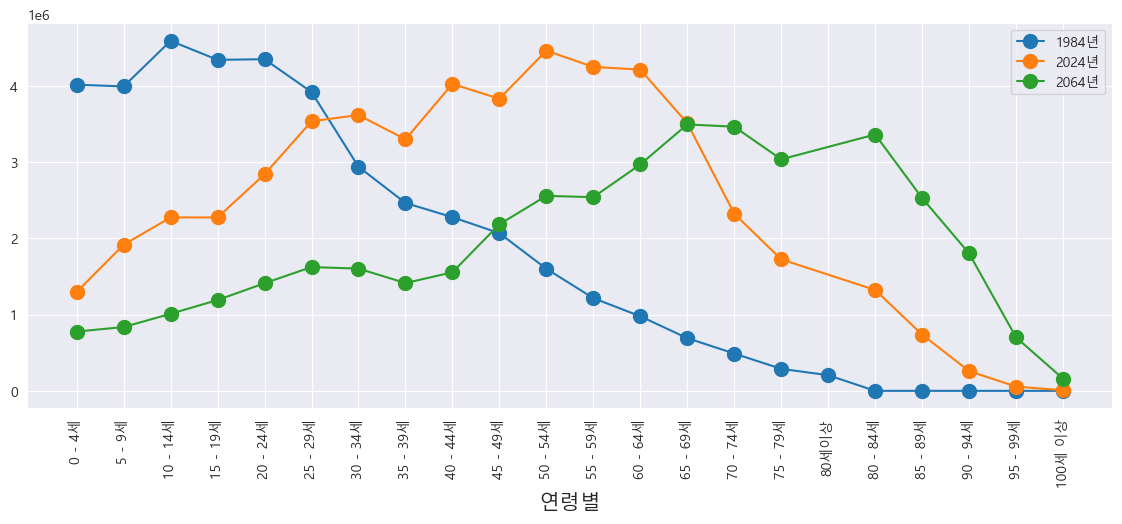

In [110]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(14, 5))
plt.xticks(size=10, rotation='vertical')


plt.plot(people_1984, marker='o', markersize=10, label = '1984년') 
plt.plot(people_2024, marker='o', markersize=10, label = '2024년')
plt.plot(people_2064, marker='o', markersize=10, label = '2064년')
plt.legend()
plt.xlabel('연령별', size=15)

In [107]:
fives = data.loc['50 - 54세'] + data.loc['55 - 59세']
sixs = data.loc['60 - 64세'] + data.loc['65 - 69세']
sevens = data.loc['70 - 74세'] + data.loc['75 - 79세']
eights = data.loc['80세이상']

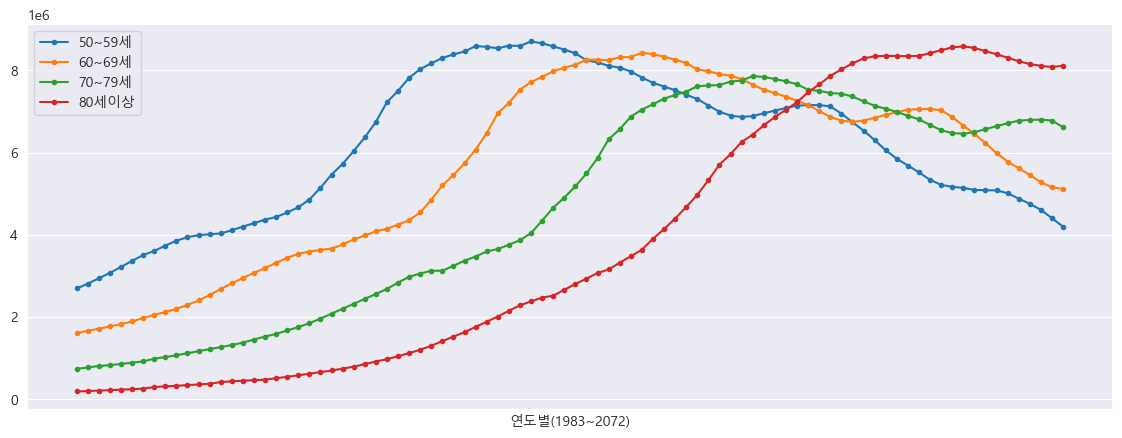

In [123]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(14, 5))
plt.xticks([])

plt.plot(fives.index, fives.values, marker='.', label = '50~59세')
plt.plot(sixs.index, sixs.values, marker='.', label = '60~69세')
plt.plot(sevens.index, sevens.values, marker='.', label='70~79세')
plt.plot(eights.index, eights.values, marker='.', label='80세이상')

# selected_years = [1983, 1993, 2003, 2013, 2023, 2033, 2043, 2053, 2063, 2072]
# plt.xticks(selected_years)
plt.xlabel('연도별(1983~2072)')
plt.legend()

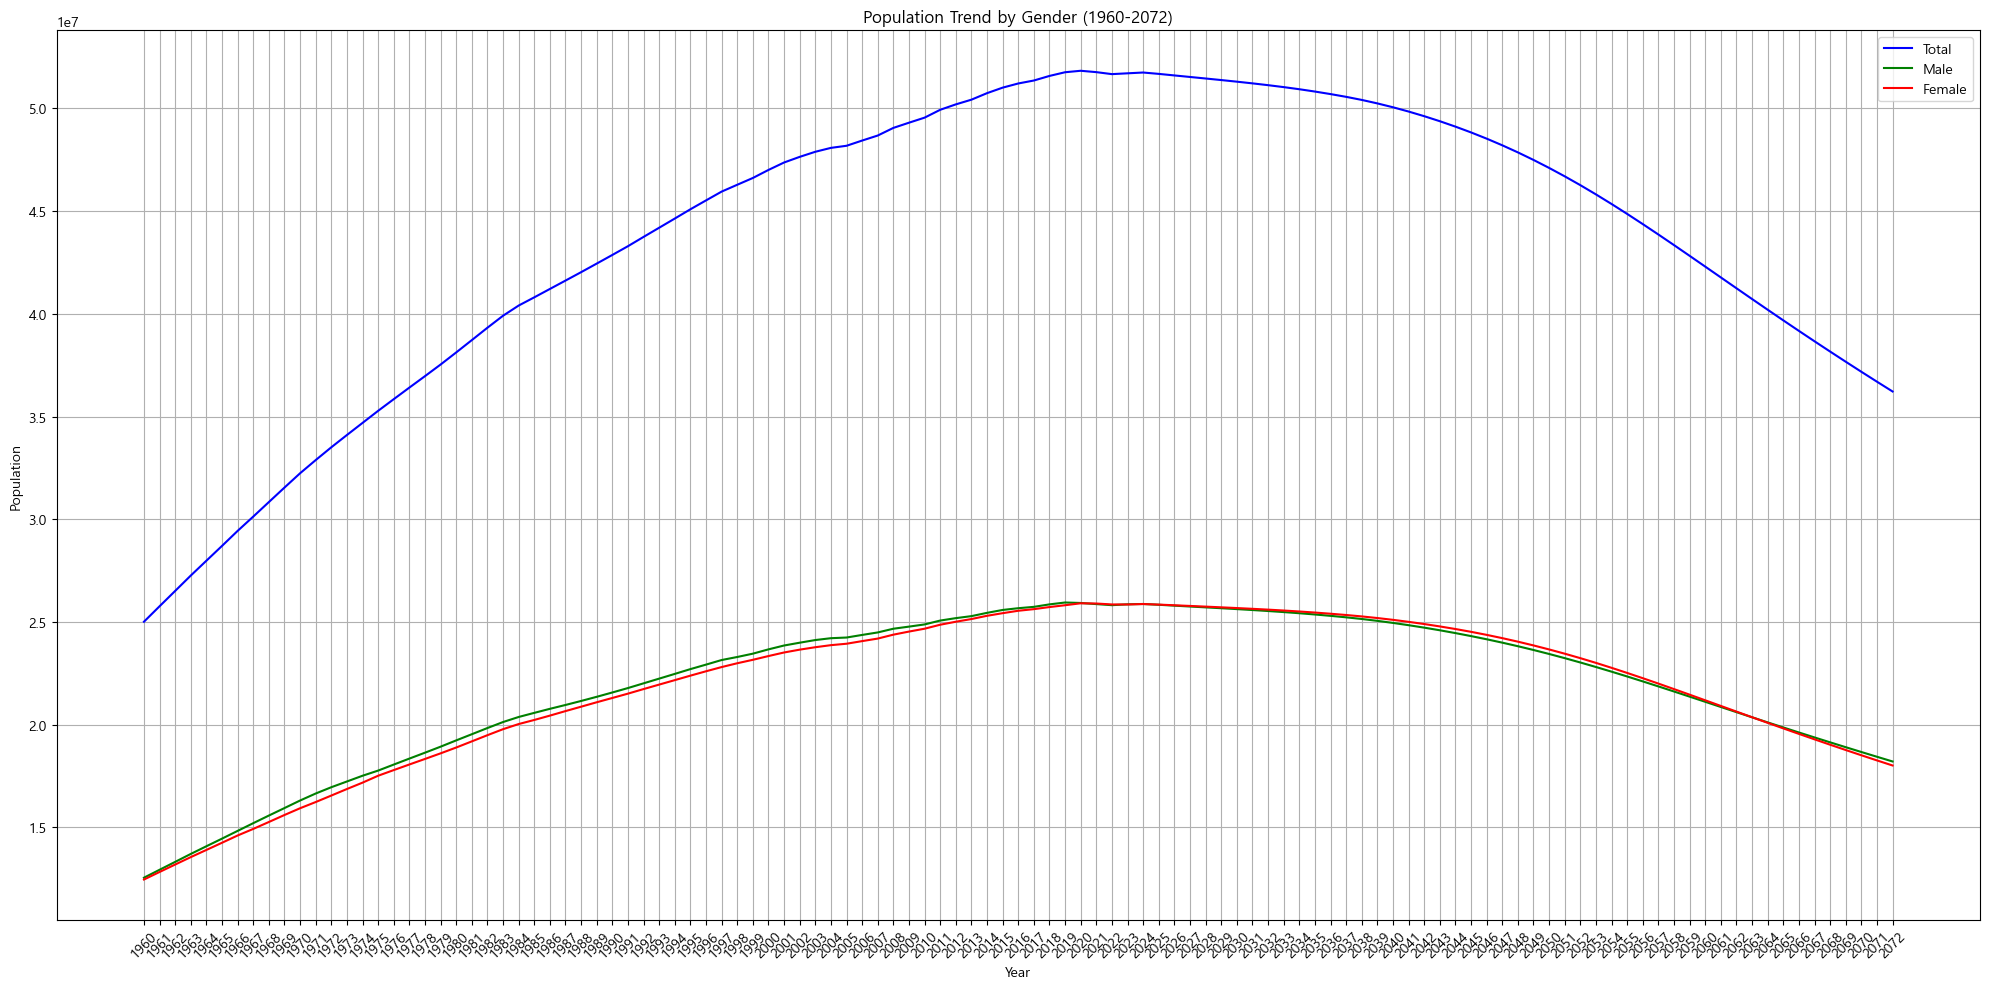

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('.\data\성_및_연령별_추계인구_1세별__5세별____전국_20240229111504(총계).csv', encoding='cp949')

years = list(map(str, range(1960, 2073)))

total_population = data.loc[data['성별'] == '전체', years].values.flatten()
male_population = data.loc[data['성별'] == '남자', years].values.flatten()
female_population = data.loc[data['성별'] == '여자', years].values.flatten()

plt.figure(figsize=(20, 10))
plt.plot(years, total_population, label='Total', color='blue')
plt.plot(years, male_population, label='Male', color='green')
plt.plot(years, female_population, label='Female', color='red')

plt.title('Population Trend by Gender (1960-2072)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


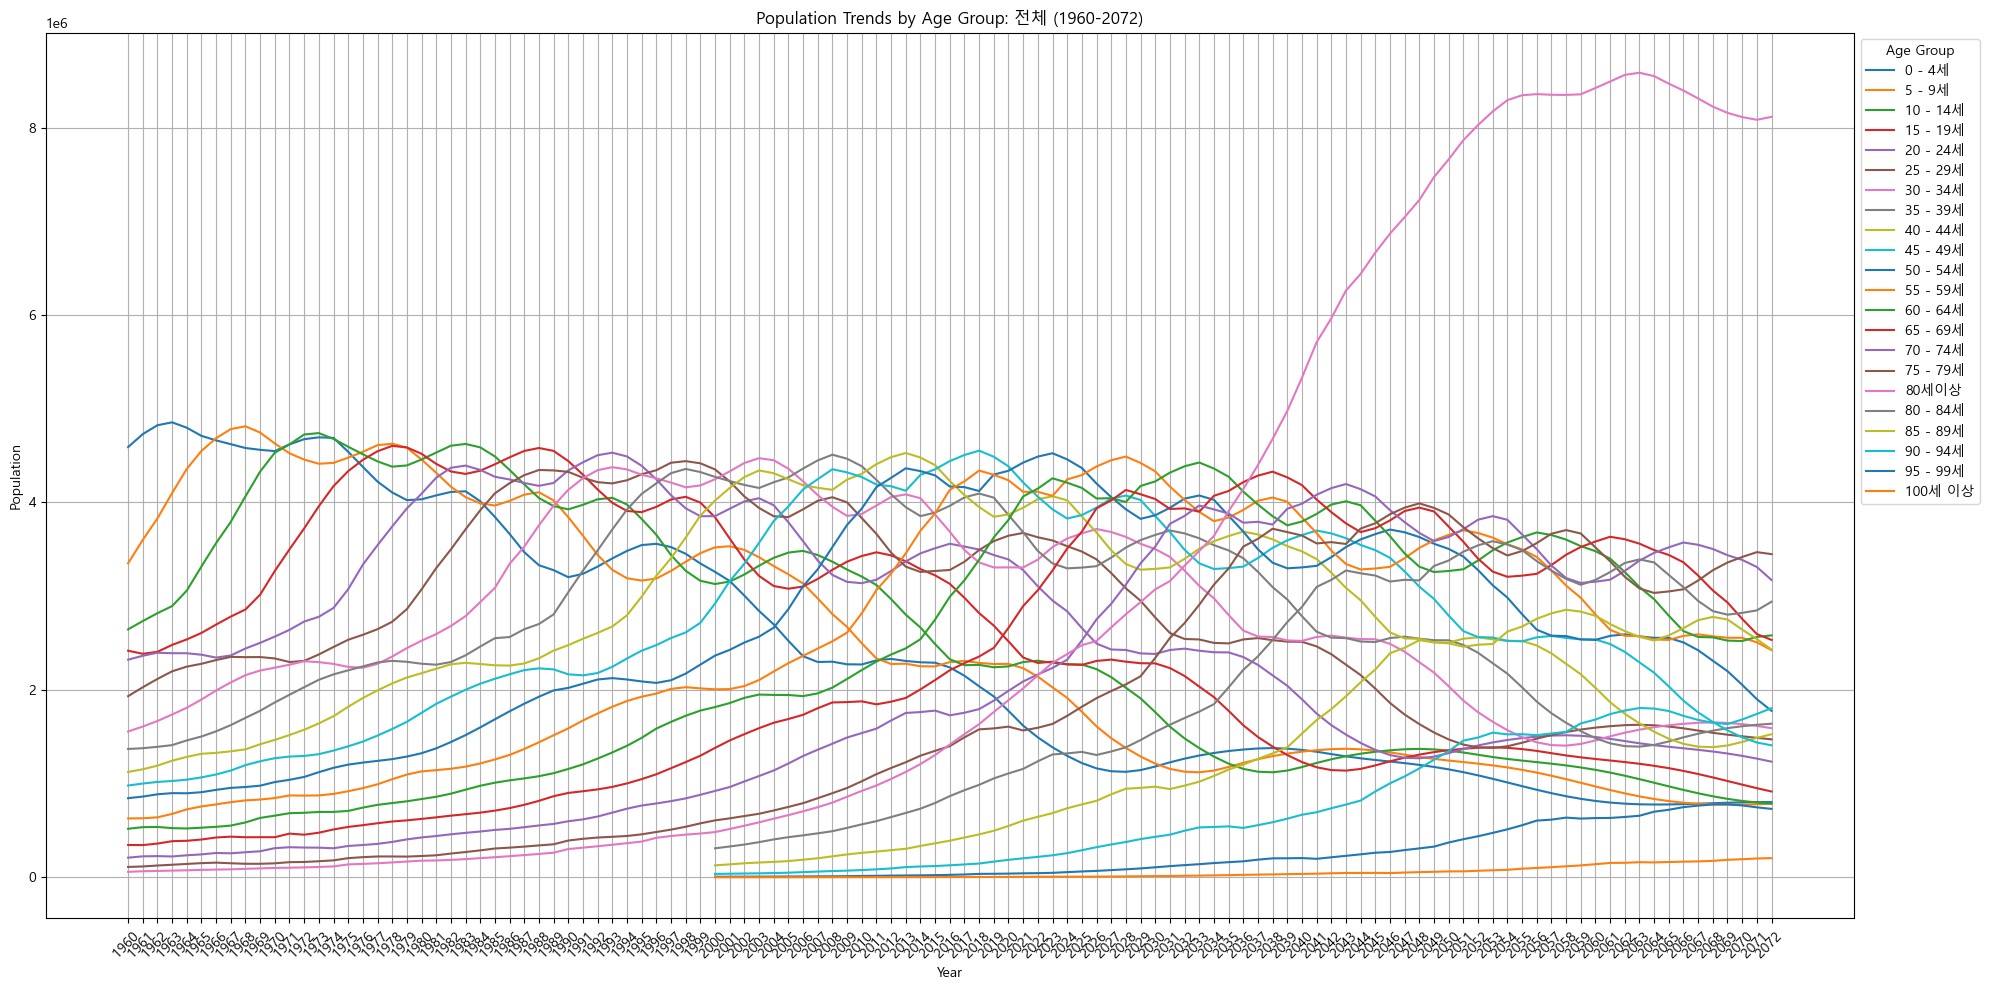

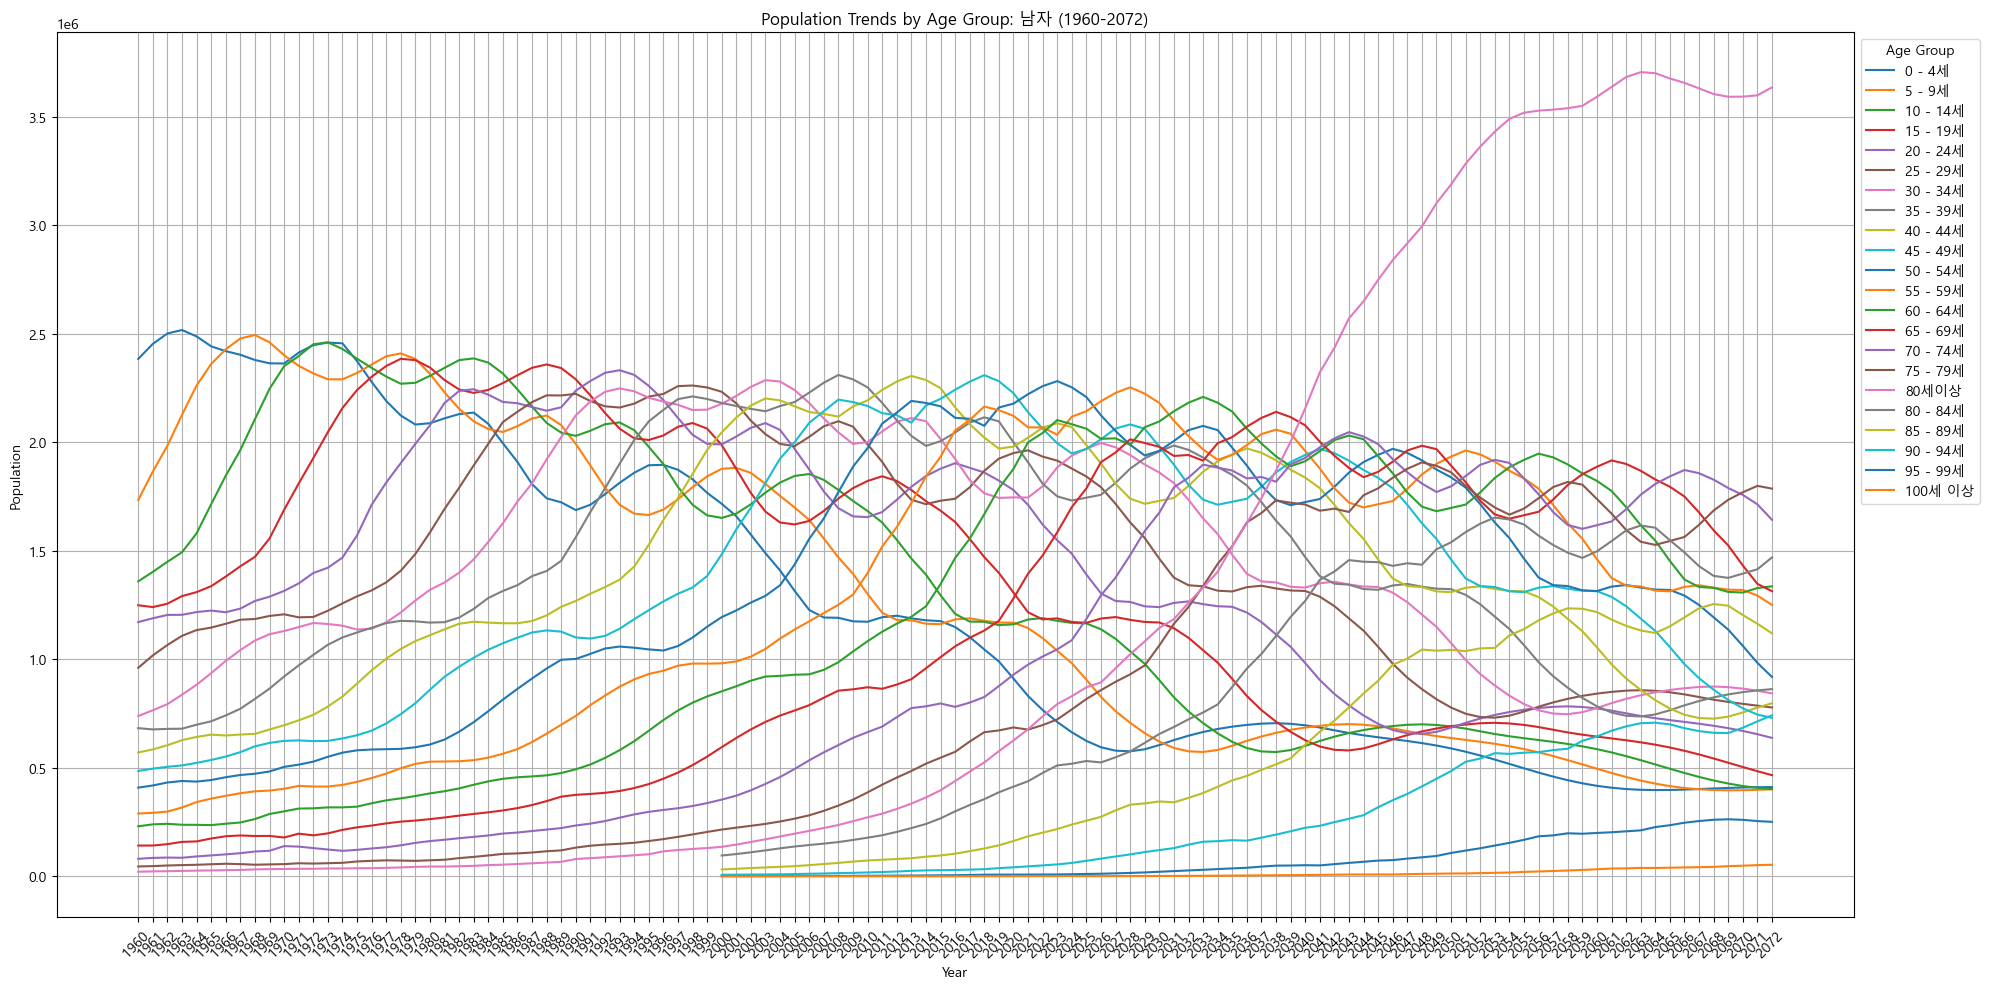

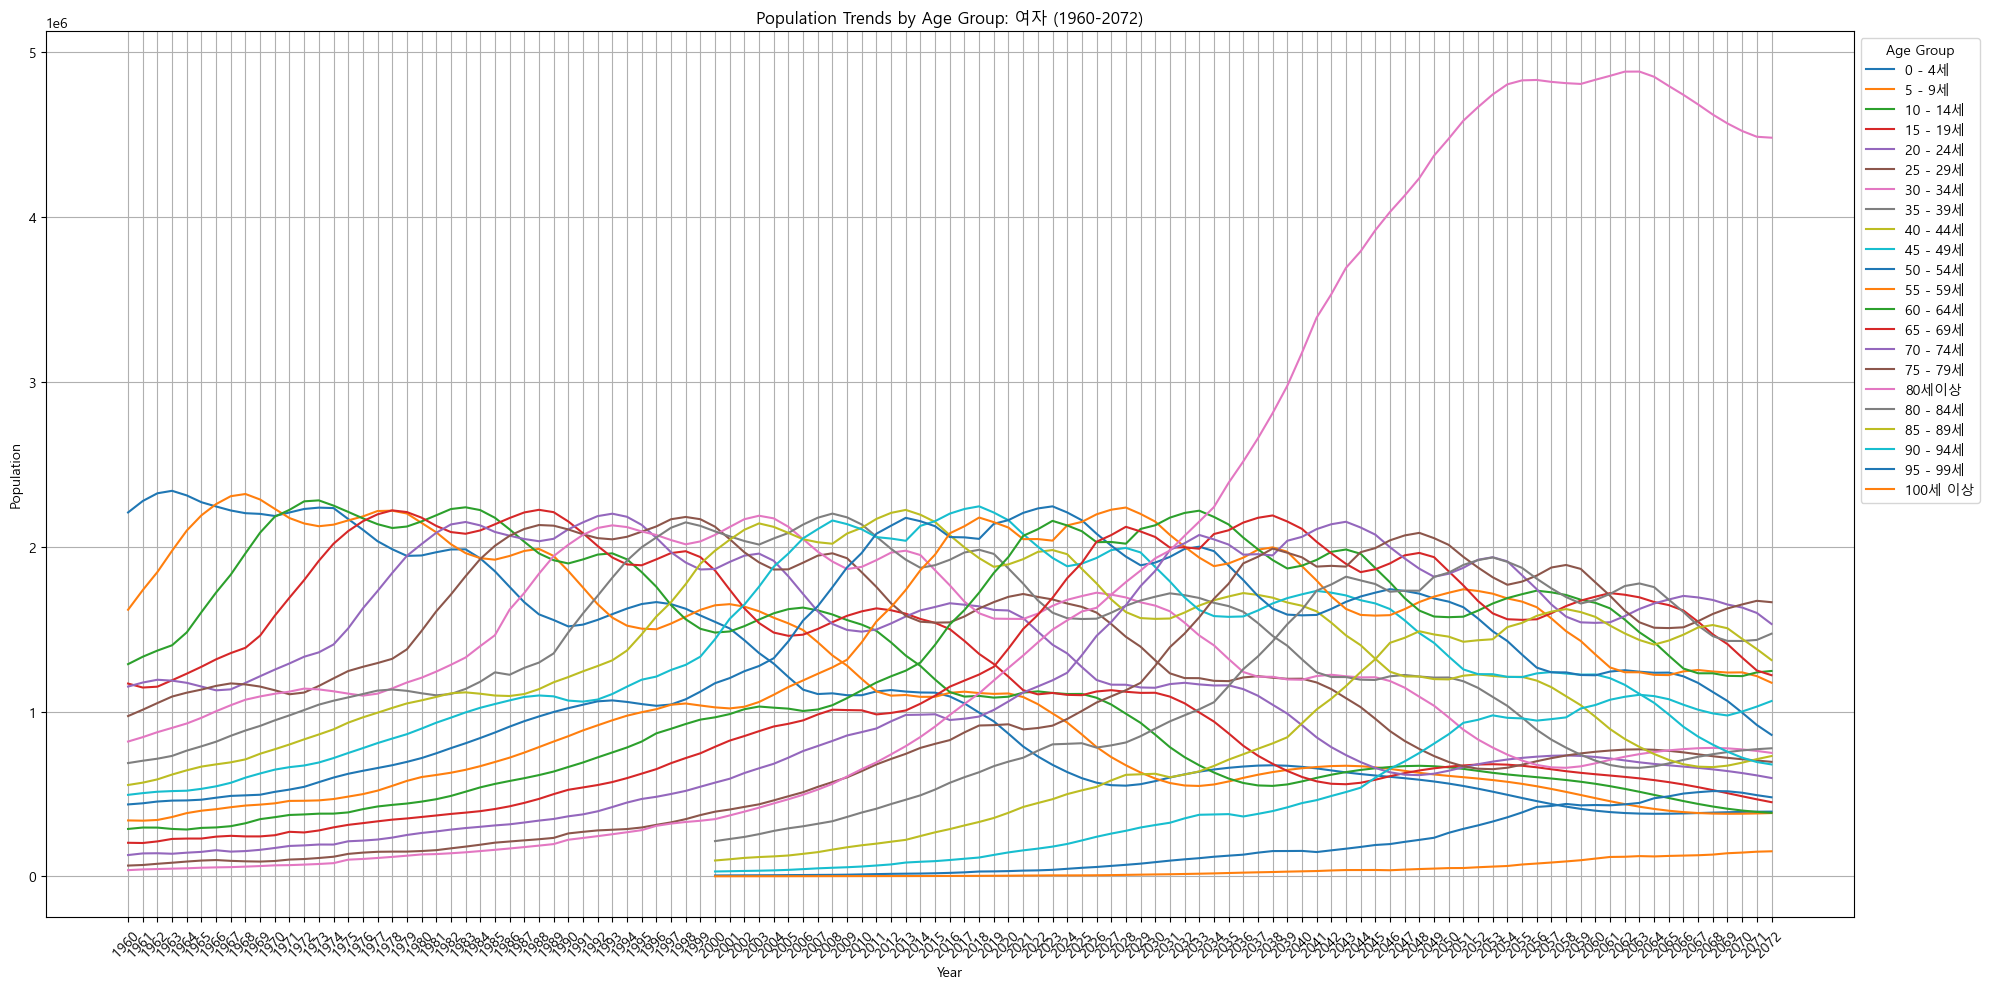

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='Malgun Gothic')

def convert_to_numeric(column):
    column = pd.to_numeric(column, errors='coerce') 
    return column

def plot_population_trends_corrected_v2(data, gender):
    gender_data = data[data['성별'] == gender]
    age_groups = gender_data[gender_data['연령별'] != '계']
    
    plt.figure(figsize=(20, 10))
    
    for _, row in age_groups.iterrows():
        numeric_row = row[years_columns].apply(convert_to_numeric)
        plt.plot(years_columns, numeric_row, label=row['연령별'].strip())
    
    plt.title(f'Population Trends by Age Group: {gender} (1960-2072)')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.xticks(rotation=45)
    plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()

data_updated = pd.read_csv(r'.\data\성_및_연령별_추계인구_1세별__5세별____전국_20240229111504.csv', encoding='cp949')

years_columns = data_updated.columns[3:].tolist() 

genders = ['전체', '남자', '여자']
for gender in genders:
    plot_population_trends_corrected_v2(data_updated, gender)
    plt.show()

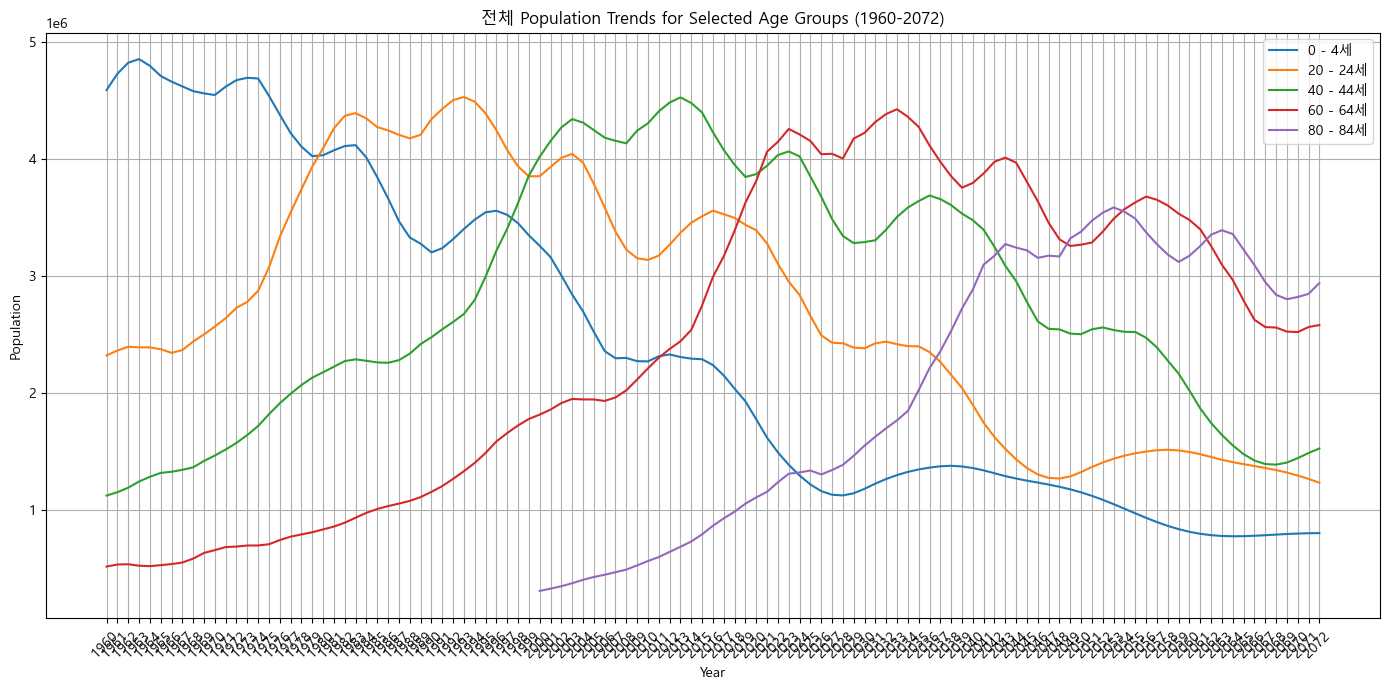

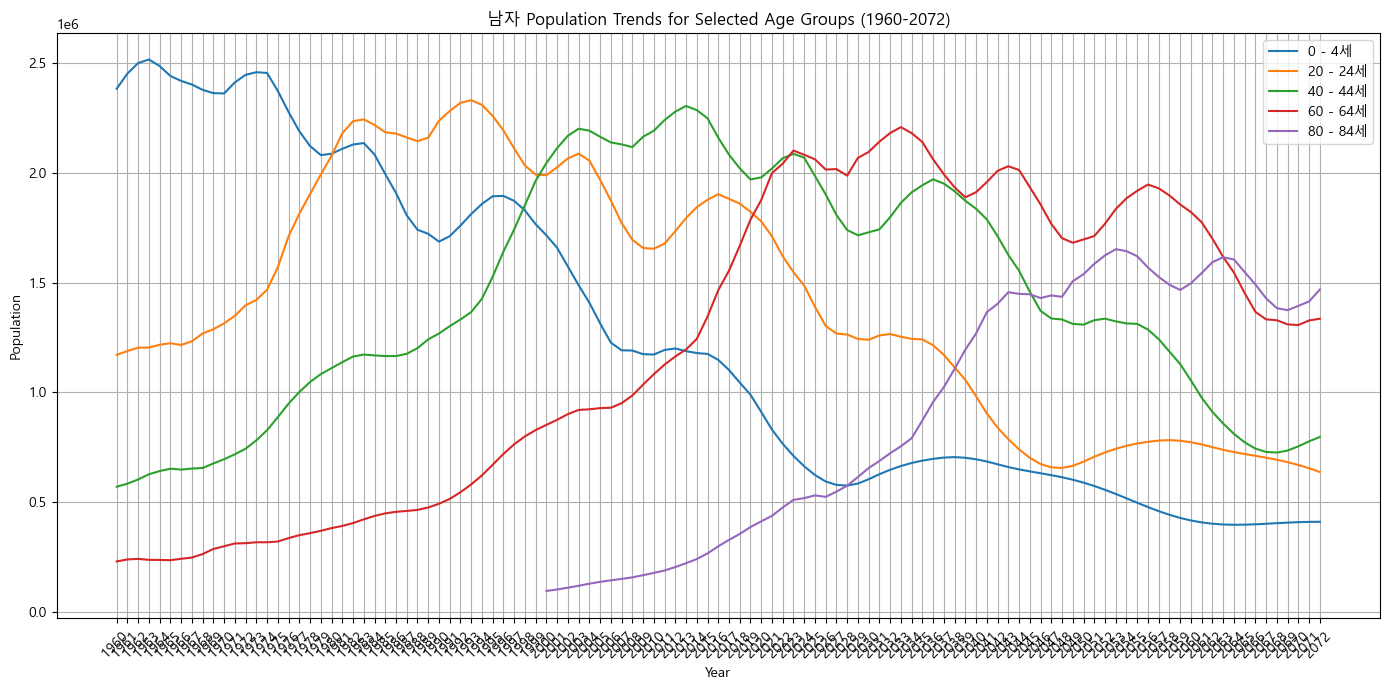

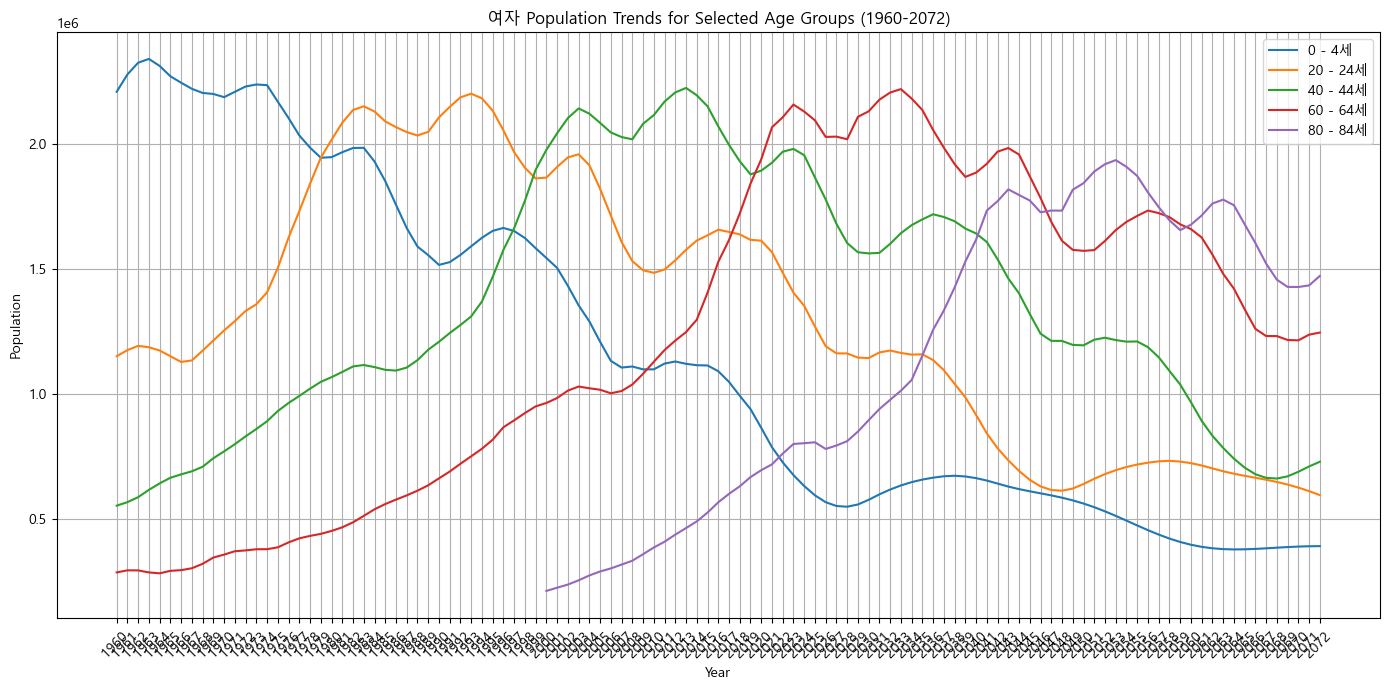

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'.\data\성_및_연령별_추계인구_1세별__5세별____전국_20240229111504.csv', encoding='cp949')

selected_ages = ['0 - 4세', '20 - 24세', '40 - 44세', '60 - 64세', '80 - 84세']

years = list(data.columns[3:])

def plot_selected_age_groups(data, gender):
    fig, ax = plt.subplots(figsize=(14, 7))
    
    filtered_data = data[(data['성별'] == gender) & (data['연령별'].isin(selected_ages))]
    
    for index, row in filtered_data.iterrows():
        population_values = row[years].replace('-', float('nan')).astype(float)
        ax.plot(years, population_values, label=row['연령별'])

    ax.set_title(f'{gender} Population Trends for Selected Age Groups (1960-2072)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Population')
    ax.legend()
    ax.grid(True)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

for gender in ['전체', '남자', '여자']:
    plot_selected_age_groups(data, gender)
